# Project on Ensemble Learning
by Sandesh Balyan

## A. Description
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.

## B. Problem Statement
This is a classificaiton problem to predict weather a customer will subscribe to a Term Deposit or not based upon data in the past campaigns

## C: Model Evaluation Parameters

1. Since the problem statement here demands to accurately predict customers who are likly to opt for Term deposit based upon other parameters
2. Also as per the data definition it seems that only 13.2%% customers opted for Term deposit in the previous campaigns hence this dataset seems to be highly imablanced

Because of the above issues and looking at the nature of the problem, accuracy of the model will NOT be the only metric for evaluation of the model.
We need to maximise the correct prediction of Positives i.e True Positives should be high and False Positives should be low.
Hence Precision and Recall along with accuracy will be another important parameter vor Model Evaluation

## 1. Importing Libraries
Not all libraries are imported at once. Some libraries are imported as and when required in this notebook

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image  

## 2. Importing dataset

In [2]:
data = pd.read_csv('bank-full.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## 3. Basic EDA

### 3.a Shape of the data

In [3]:
data.shape

(45211, 17)

##### Observations
1. Data has 45211 rows and 17 fetures/columns
2. Feature named 'Target' is our Target variable

##### 3.a.1 Checks on shape of data
In this section we will check proportion of Target variable classes

In [99]:
print(data.groupby('Target').size())
print('-'*60)
print("Proportion of Target variable class No:Yes is : {0:0.2f} : 1".format((data.groupby('Target').size()[0]/data.groupby('Target').size()[1])))

Target
no     39922
yes     5289
dtype: int64
------------------------------------------------------------
Proportion of Target variable class No:Yes is : 7.55 : 1


##### Observations:
1. It is clearly visible that dataset is imbalanced with class 'No' containing approx 8 times more data than class 'Yes'

We can also verify the same later in EDA

### 3.b Data types verification
In this section we will just check the datatype of each feature. But we will take action later in the analysis

In [5]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [6]:
col_cat = [] #blank list for list of categorical columns
col_num = [] # blank list for list of numerical variables
for feature in data.columns:
    if data[feature].dtype == 'object':
        print('Unique values in feature : ' + feature + ':')
        print('-'*60)
        print(data[feature].value_counts())
        print('='*60)
        col_cat.append(feature) # add feature to categorical column list
    else:
        col_num.append(feature) # add feature to numrical column list

Unique values in feature : job:
------------------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
Unique values in feature : marital:
------------------------------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
Unique values in feature : education:
------------------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
Unique values in feature : default:
------------------------------------------------------------
no     44396
yes      815
Name: default, dtype: int64
Unique values in feature : housing:
------------------------------------------------

##### Insights

1. There is unknow in variables 'Jobs', 'outcome', 'contact','poutcome'. These will be handled later in analysis
2. 5289 values for Yes in Target variable comparedc to 39922 values for No again quantifies the imbalance

In [100]:
# List of categorical columns
col_cat

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Target']

In [8]:
# list of numerical columns
col_num

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

### 3.c. Checking for presence of null values
In this section we will check for the presence of null values in each variable.

In [9]:
data.isnull().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
Target       False
dtype: bool

There are no ull values in any of the columns. We will however check for the presence of such values which could be out of context as well e.x unknowns in job, education, contact and poutcome variables

######  3.c.1 Duplicate values

In [10]:
data.duplicated().value_counts()

False    45211
dtype: int64

There are no duplilcate rows in this dataset.

### 3.d 5 point summary

In [11]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


##### Insights

1. Variable pdays has Q3 values as -1, wheras mean is 41 and max is 871. There are huge number of outliers and data is heaviliy right skewed
2. Variable Previous has most of the values as 0. mean=0.58 and median = 0. This shows most of the customers are either contacted for the first time or has no data available for this variable
3. Variable 'day' is failry distributed.
4. Variable 'campaign' is also right skewed with lots of outliers. mean and median are not too far away but max us much higher than median


###  3.e Checking the presence of outliers

#### 3.e.1 Outliers using length if whiskers

In [12]:
# function for detection of outliers based upon concept of whisker being 1.5 times length of 
def handle_outlier(x):
    IQR = data[x].quantile(0.75) - data[x].quantile(0.25)
    min_range = data[x].quantile(0.25) - 1.5*IQR
    max_range = data[x].quantile(0.75) + 1.5*IQR
    outliers = data[(data[x]>max_range) | (data[x]<min_range)]
    return outliers


In [13]:
df_outlier = pd.DataFrame()
list_dict = []
for feature in col_num:
    df = handle_outlier(feature)
    x = {'Feature name': feature,
        'Total count': data[feature].count(),
         'Outlier Count': len(handle_outlier(feature)),
         '% Outliers': (len(handle_outlier(feature))/len(data)*100),
         'min_outlier': df[feature].min(),
         'max_outlier': df[feature].max()
        }
    list_dict.append(x)

df_outlier = df_outlier.append(list_dict, True)
print('Outlier analysis on numerical variables')
df_outlier

Outlier analysis on numerical variables


,Feature name,Total count,Outlier Count,% Outliers,min_outlier,max_outlier
0,age,45211,487,1.077171,71.0,95.0
1,balance,45211,4729,10.459844,-8019.0,102127.0
2,day,45211,0,0.000000,NaN,NaN
3,duration,45211,3235,7.155338,644.0,4918.0
4,campaign,45211,3064,6.777112,7.0,63.0
5,pdays,45211,8257,18.263255,1.0,871.0
6,previous,45211,8257,18.263255,1.0,275.0


#### 3.e.2 Outliers visualisation And Distributions of numeric variables
In this section we will visualise presence of outliers in numeric variables using Box plots.
At the same time we will also visualise the distribution of these variables

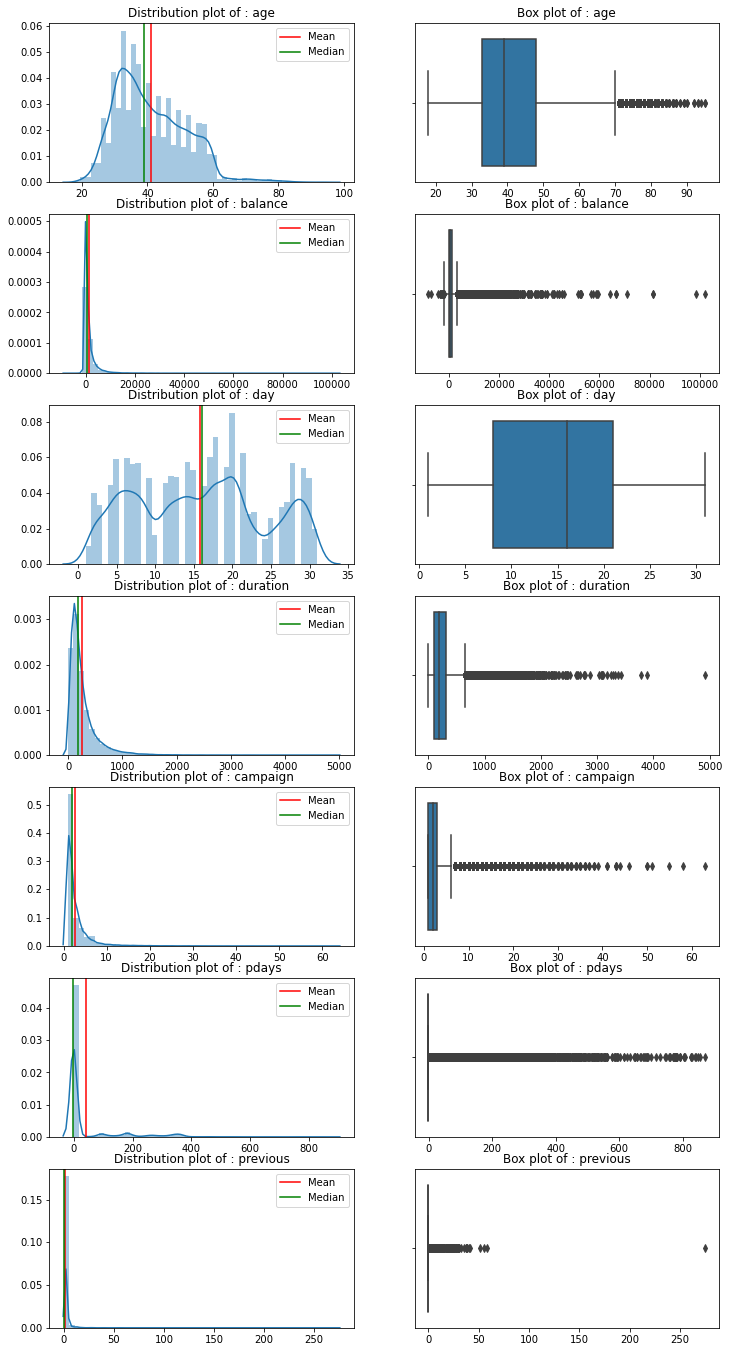

In [14]:
fig = plt.figure(1,(12,24))
c=0
for i,feature in enumerate(col_num):
    c += 1
    ax1 = plt.subplot(7,2,c)
    sns.distplot(data[feature])
    ax1.set_title('Distribution plot of : ' + feature)
    ax1.set_xlabel(None)
    ax1.axvline(data[feature].mean(),c='r',label='Mean')
    ax1.axvline(data[feature].median(),c='g',label='Median')
    ax1.legend(loc="upper right")
    
    c+=1
    ax2 = plt.subplot(7,2,c)    
    sns.boxplot(data[feature])
    ax2.set_title('Box plot of : ' + feature)
    ax2.set_xlabel(None)

#### Insights
1. There are outliers in all numeric columns except variable 'day'
2. All the variables are right tailed or positively skewed except variable balance which has some number of observations in left tail as well
3. Variable Age:

    3.1. There are 1% outliers in the variable age and min value of outlier is 71
    
    3.2. This means 99% values lies between 20 and 70 years of age
    
    3.3. Distribution is right tailed
    
    3.4. Mean age is around 40
    
4. Variable Balance:

    4.1. There are 10% outliers in this variable
    
    4.2 There are many negative values as well in this variable as evident from the distribution plot
    
    4.3 We might have to handle negative values as balance being negative doesnot seems to be correct
    
    4.4 Mean is 1340 and median is 450. Q3 is 1428. There is not much differencein mean and Q3. but median is way too low. this shows there are large number of values inthe lower range upto 1428
    
5. Variable 'Day:

    5.1. Day seems to be almost equally distributed for all values
    
    5.2. Mean and median are almost the same
    
    5.3. There are no outliers in this variable. It means customers were contacted equally on all days of a month.
    
    
6. Variable 'Duration':

    6.1. Duration has almost 7% outliers in its data and min value of outlier is 644. Which means 93% of the values lie between 0 to 644 seconds while maximum value is around 5000 seconds
    
    6.2. Data is right skeewed in this variable and outliers are only on the higher side
    

7. Variable 'Campaign'

    7.1. Approx 6% outliers and from distribution plot we can see that most of the values are focussed between 0 and 10 which means 94% values are between 0 and 10.  Alternatively, approx 0 to 10 number of contacts were made for 94% of the customers.
    
    7.2. Distribution of campaign is right skewed and outliers are only on the higher side
    
    
8. Variable 'pdays':

    8.1. min and 75th percentile values are -1 and mean is 40 days.
    
    8.2 There are 18% oultiers and min value of outlier is 1 day. Which means 82% values for this variable lies between -1 and 1
    
    8.3 This also means that only 18% customers were not contacted for less than one day after the last campaign
    
    8.4 This also means that most of the customers were contacted recently after the last campaign, which is a good indications.
    
    
9. Variable 'Previous:

    9.1 min and Q3 are 0.
    
    9.2 There are 18% outliers and min value of outlier is 1 so 82% values are 0 and 1. This means approx 82% customers were contacted for the first time in this campaign



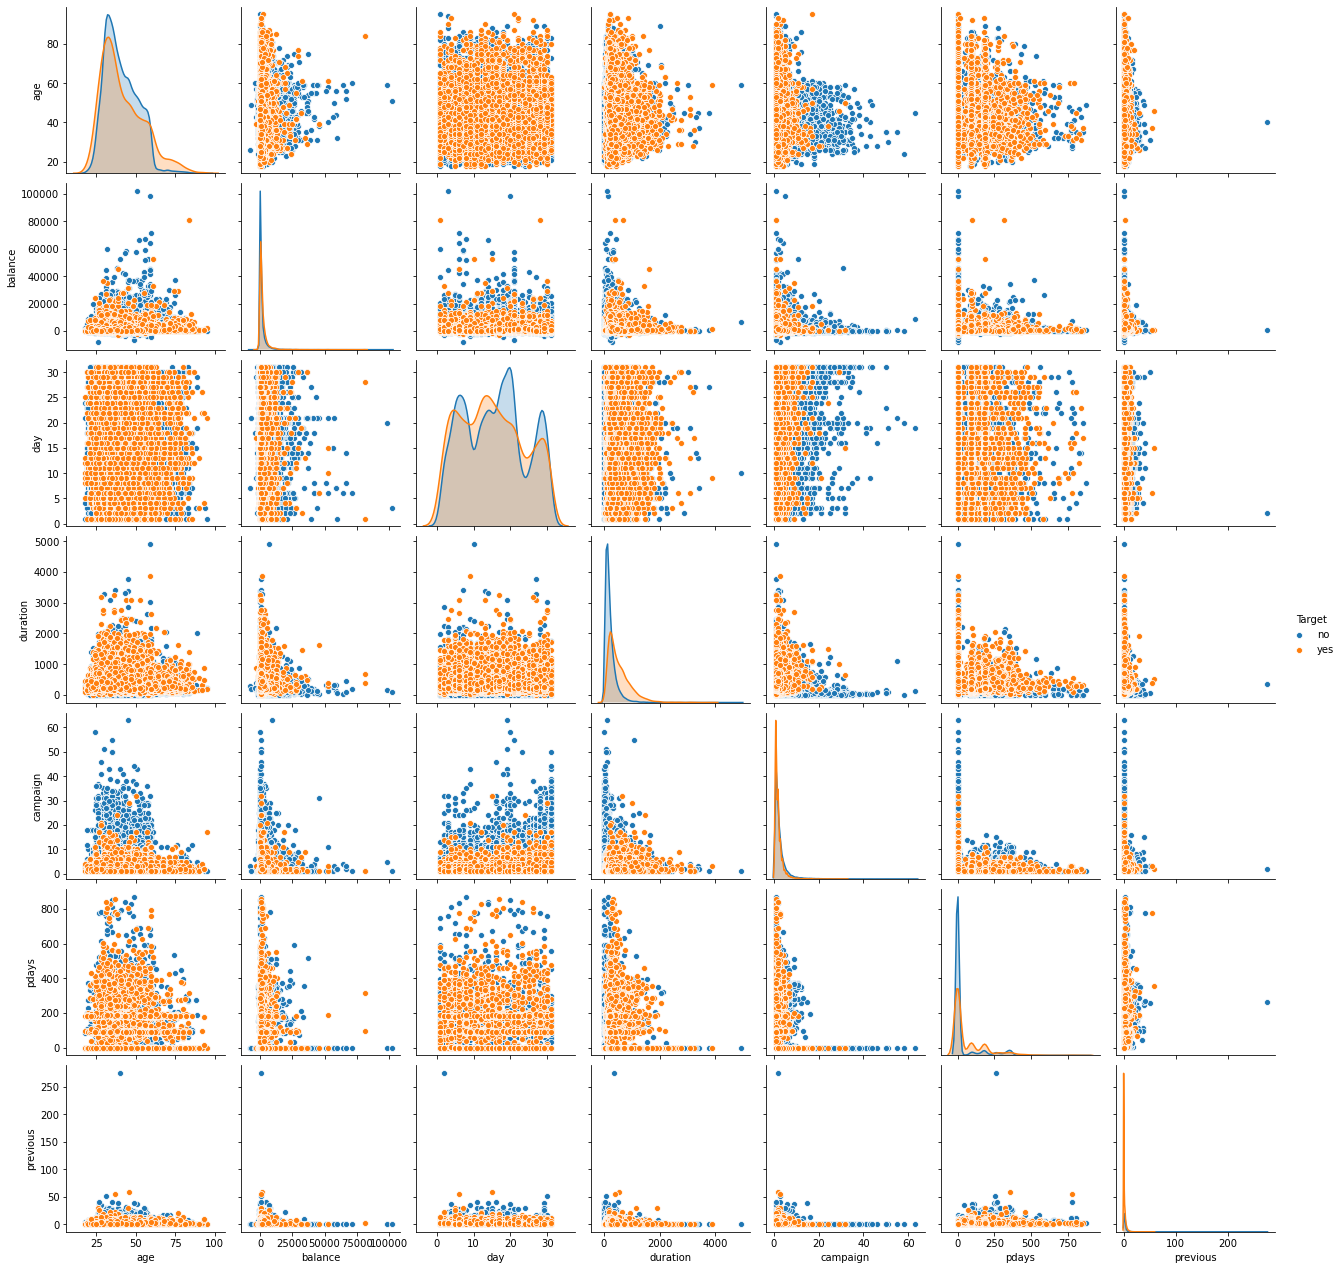

In [15]:
sns.pairplot(data=data, hue='Target',diag_kind='kde')

##### Inisghts
1. from diagonals: There is not much difference in distribution of all numeric variables for both the classes of target variable
2. There doesnot seem to be any realtion between any of the dependent variable

### Correlation of numeric attribbutes

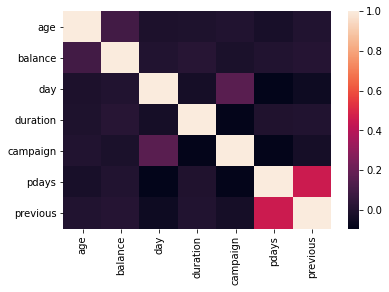

In [16]:
corr = data.corr()
sns.heatmap(corr)

##### Insights
There is no good correlation between any of the numeric variables expect pdays and previous hence no point in taking any action on this basis

### 3.f Analysis of categorical variables

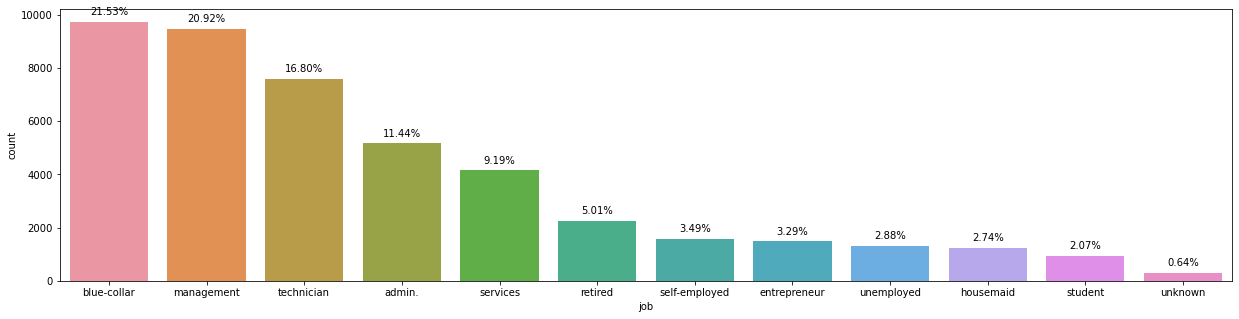

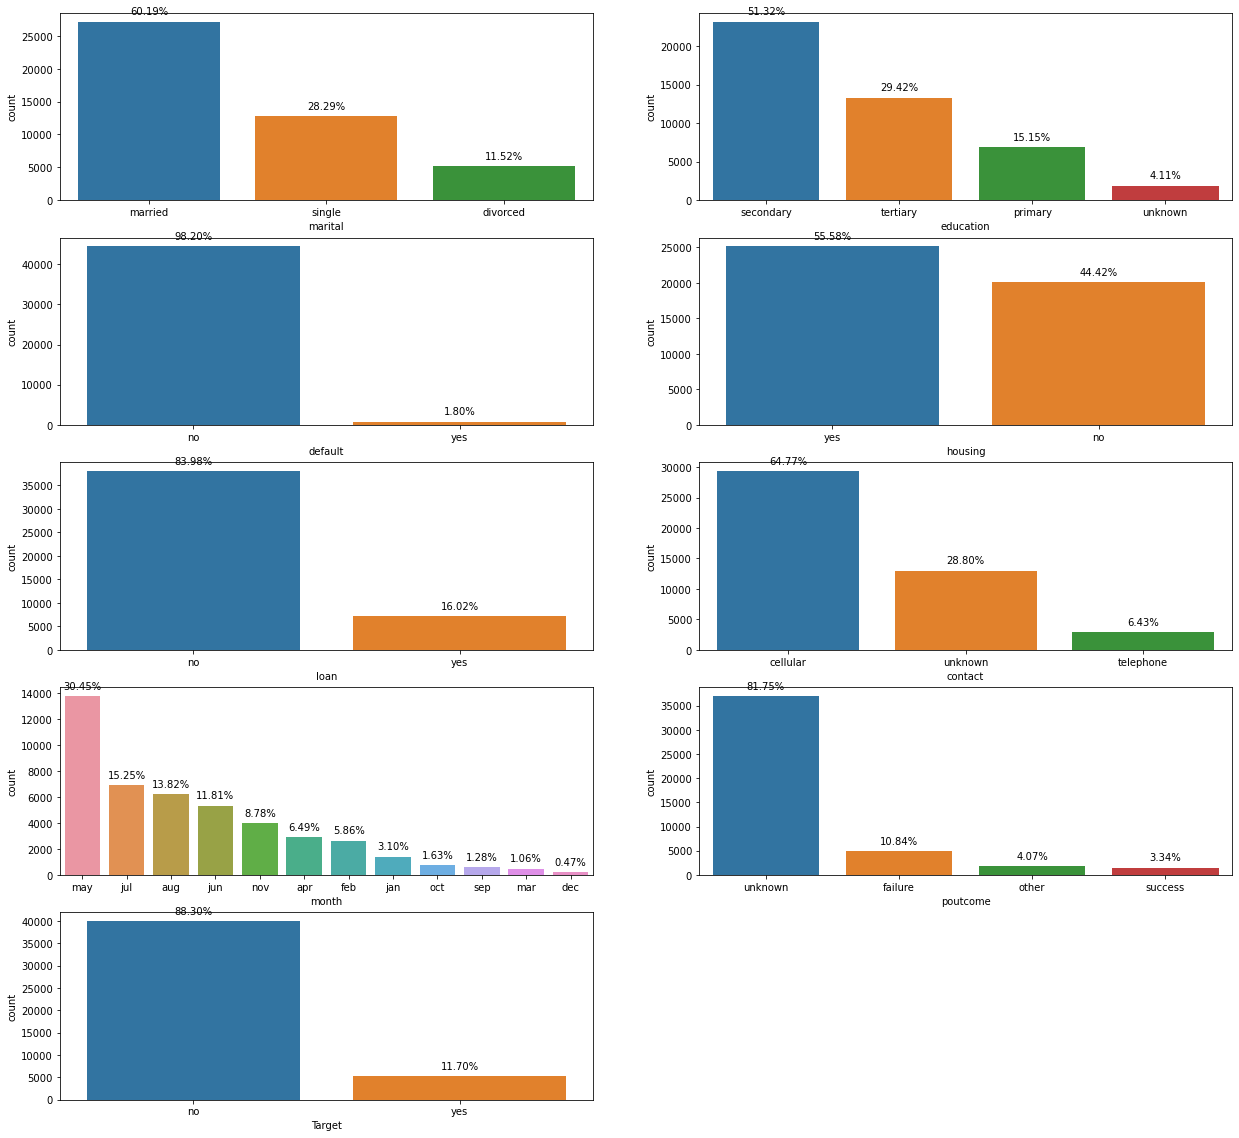

In [17]:
fig1,ax = plt.subplots(1,1,figsize=(21,5))
splot = sns.countplot(data['job'],ax=ax,order=data['job'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height()/len(data)*100, '.2f') + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

fig2 = plt.figure(2,(21,20))
for i,feature in enumerate(col_cat[1:]):
    ax = plt.subplot(5,2,i+1)
    splot = sns.countplot(data[feature],order=data[feature].value_counts().index)
    for p in splot.patches:
        splot.annotate(format(p.get_height()/len(data)*100, '.2f')+'%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


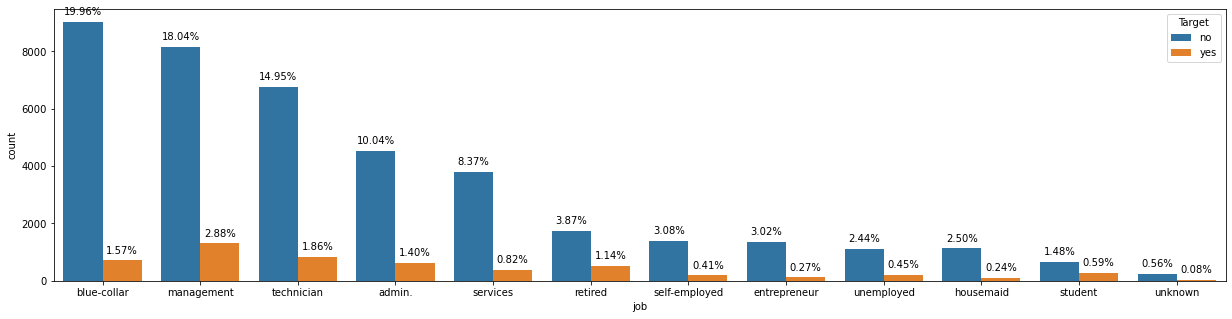

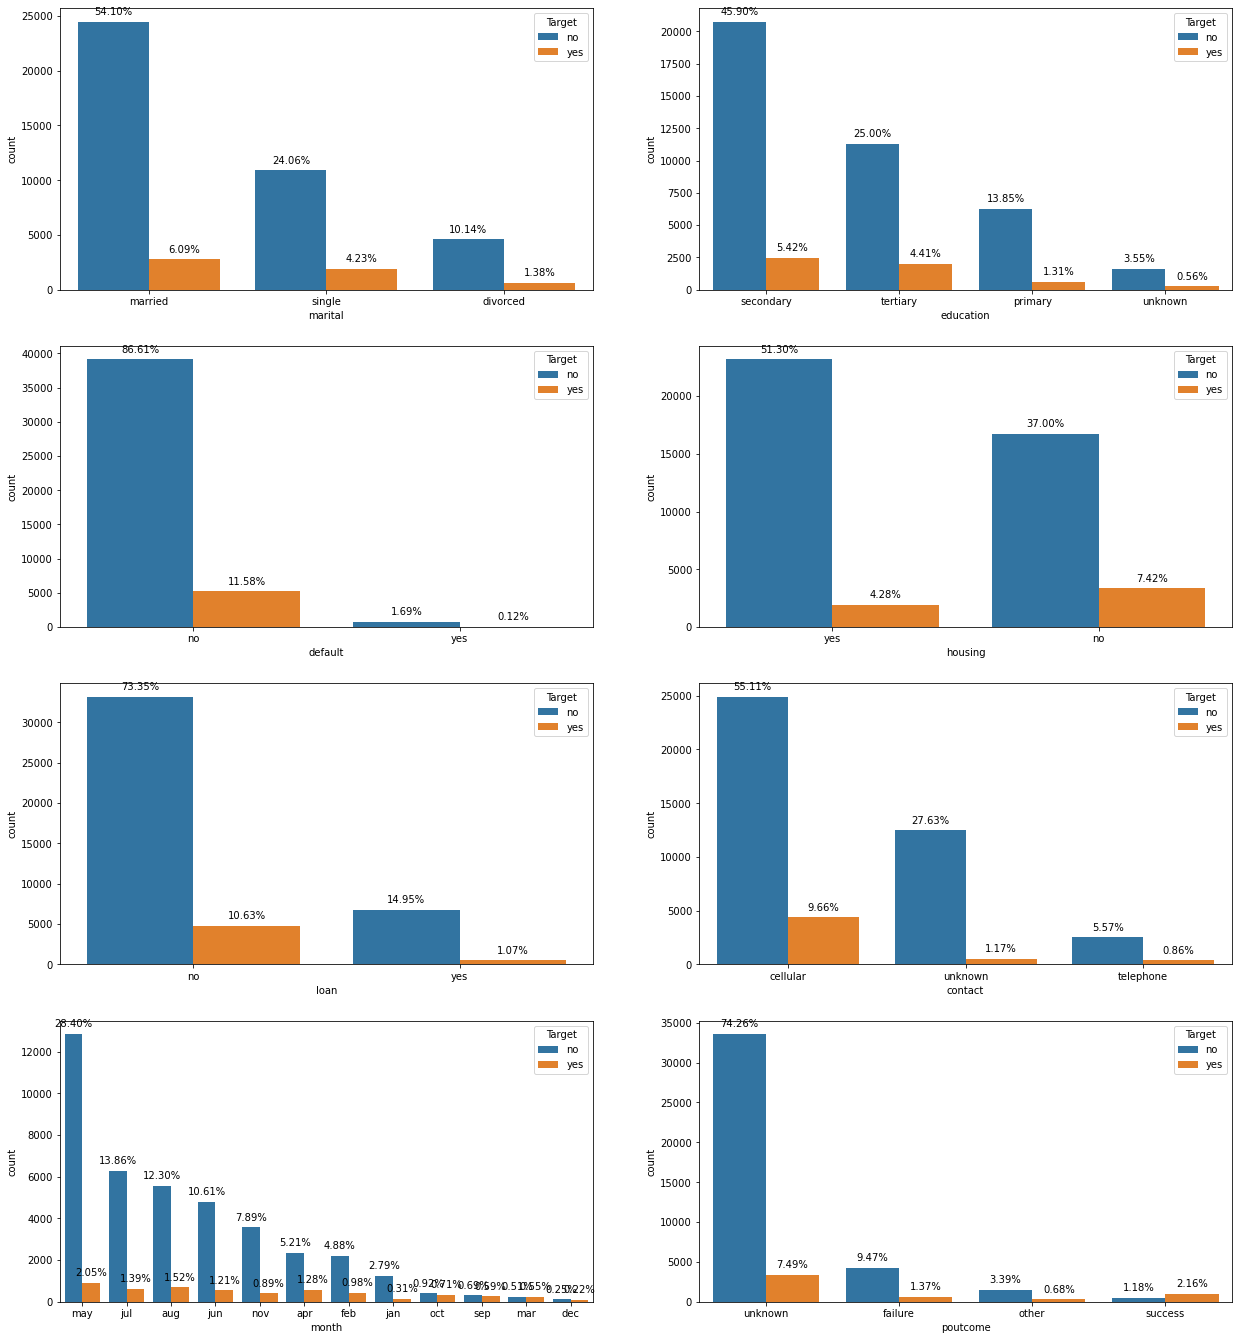

In [18]:
fig1,ax = plt.subplots(1,1,figsize=(21,5))

splot = sns.countplot(data['job'],ax=ax,hue=data['Target'],order=data['job'].value_counts().index)
for p in splot.patches:
    splot.annotate(format(p.get_height()/len(data)*100, '.2f') + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

fig2 = plt.figure(2,(21,30))
for i,feature in enumerate(col_cat[1:-1]):
    ax = plt.subplot(5,2,i+1)
    splot = sns.countplot(data[feature],hue=data['Target'],order=data[feature].value_counts().index)
    for p in splot.patches:
        splot.annotate(format(p.get_height()/len(data)*100, '.2f') + '%', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')


####   Insights
1. Job:
    - 2.88% customers who opted for this term deposit were in Management cadre
    - It seems that customers in higher cadre jobs tend to opt more for term deposit than other e.x. management(2.8%), Technicians(1.86%), blue collar(1.57%

2. Mariatl status:Out of all people who opted for this term depost 6.09% were married, 4.23% were single. Only 1.2% of divorcees opted for this product

3. Education: People with secondary and tertiary eduction tend to opt more for this product (5.42 and 4.4%)
4. Default: Almost 12.5% customers who opted didnot have credit in default.
5. Housing loan: People with no housing loan tend to opt more for this product(7.42%) than customers with housing loan(4%)
6. Personal Loan: 10.63% customers without a personal loan opted for this product as against only 1% customers with a personal loan
7. Contact: 10% customers contact via cellular modes opted for term deposit as against 0.86% customers contacted via telephone
8. Month: Highest number of customers were contcted in May and highest number opted for term deposit. this could be because higher number of customers were contacted
9. poutcome: 7.49% customers' (who opted for product in previous campaign )poutcome is unknow. This could be because they are contacted for the first time or were not contacted in the previous campaign. 2.16% customers who were a success conversion in previous campaigns also opted for products in this campaign

Overall:
There is no much relationship between any categorical variable and Target variable. dataset is highly imbalanced there are almost 88% values for Categor No i.e. for those who didnot opt for the product


### 3.g Distribution of Numerical variables over Target variable

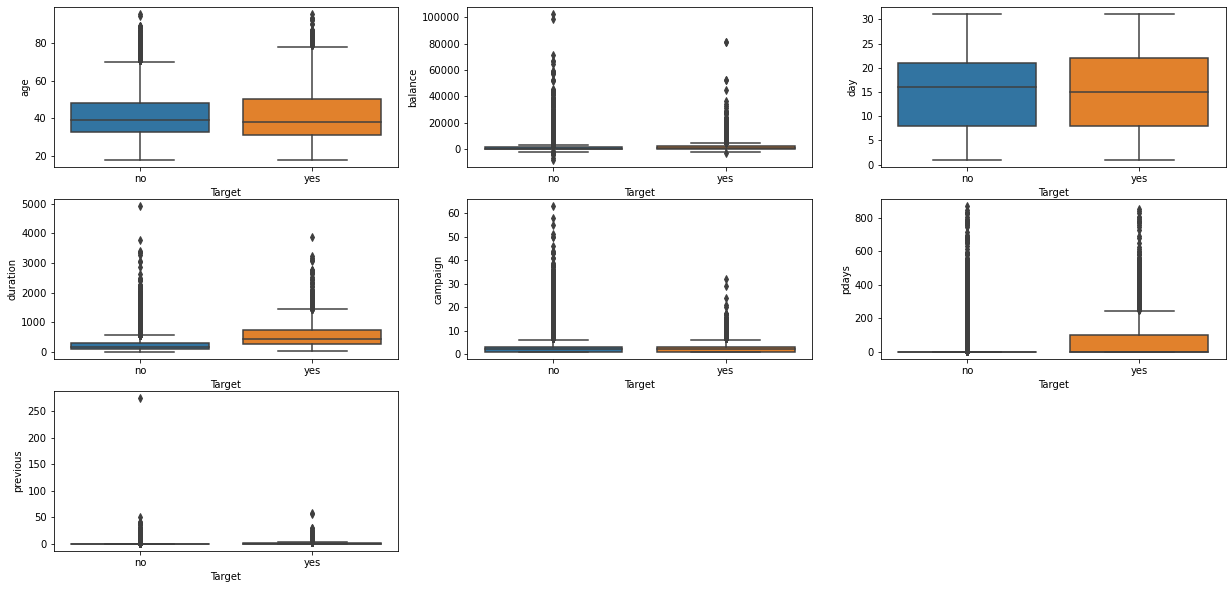

In [19]:
fig = plt.figure(1,(21,10))

for i, feature in enumerate(col_num):
    ax = plt.subplot(3,3,i+1)
    sns.boxplot(x='Target',y=feature,data=data)

##### Insights

1. For all variables except duration and pdays distribution for both the classes seems to be almost same
2. duration/pdays :  seems to have higher median and max values for yes than No. This gives an impression that more we  contact a customer or higher the duration of the call,  higher will be the chances that customer will accept the product

### 3.h Analysis for comparison of scales of numeric variables

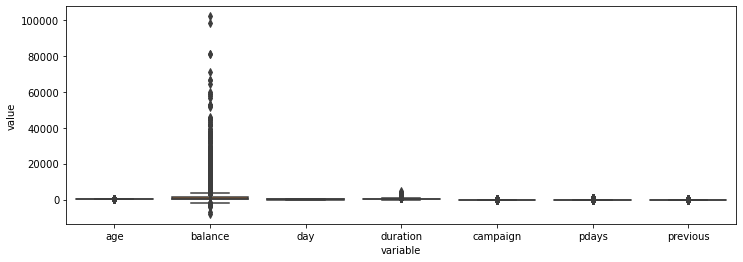

In [20]:
fig = plt.figure(1, (12, 4))
ax = plt.subplot(1,1,1)
sns.boxplot(x="variable", y="value", data=pd.melt(data[col_num]))

##### Inisghts
Variable 'Balance' have very large values compared to other variables(day, campaign, pdays and previous).

Although decision trees are not affected by scaling howver, since we need to build some basic classifiers as well other than decision trees and ensembles it will be good to scale

#### Consolidating Insights from EDA

1. Overall there is no correlation among the variables and hence there is no clear relationship available for variables
2. It will be good to scale the data
3. There are outliers in most of the variables. pday san dpreviou shave around 18% values as outliers. Campaign and duration around 7% and balance around 10%
4. Data is imbalanced for class labels. Highr values for class label NO than class label Yes

## 4 Data preparation

###  4.1 Handling Outliers
We will use the dataframe preapred in the above steps to analyse the strength of outliers in each variable
We will use following strategy to do the same:

    1.age		: There are only 1% outliers. Drop these outliers as this will not impact integrity of days
    2.balance	: Handle negative values  by replacing them with median as these seems to be some typo error(balance being  negative in a banking system): replace outlier with mean as this is an important variable and dropping the outlier may affect the data 
    3.days		: No action
    4.duration 	: Drop this column entirely as values in this column are mostly insignificant
    5.campaign 	: Impute with median. 93% values are <6% and 6% values are between 7 and 63
    6.pdays		: Drop these variable entirely as around 82% values are <1 i.e 0 or -1
    7.previous	: Drop this variable as around 82% values are <1

In [21]:
df_outlier

,Feature name,Total count,Outlier Count,% Outliers,min_outlier,max_outlier
0,age,45211,487,1.077171,71.0,95.0
1,balance,45211,4729,10.459844,-8019.0,102127.0
2,day,45211,0,0.000000,NaN,NaN
3,duration,45211,3235,7.155338,644.0,4918.0
4,campaign,45211,3064,6.777112,7.0,63.0
5,pdays,45211,8257,18.263255,1.0,871.0
6,previous,45211,8257,18.263255,1.0,275.0


#### 4.1.1 Dropping the columns Duration, pdays and previous
1. Prepare a copy of the original dataset
2. prepre a list of columns to be dropped
3. drop and store in new dataset df

In [22]:
data_copy = data.copy()
col_drop = ['duration','pdays','previous']
df = data.drop(col_drop,axis=1)
df.shape

(45211, 14)

#### 4.1.2 Impute with median for variables age balance and campaign
In following section we will take action on outlier by replacing outlier values in various columns or by dropping the columns

In [23]:
#Variable 'age': Drop the outliers
x_age = handle_outlier('age')
lst_replace = list(np.array(x_age['age']))
df['age'] = df['age'].replace(lst_replace,df['age'].median())

In [24]:
#Variable 'campaign':  Impute with Median
x_camp = handle_outlier('campaign')
lst_replace = list(np.array(x_camp['campaign']))
df['campaign'] = df['campaign'].replace(lst_replace,df['campaign'].median())

In [25]:
#Variable 'balance': Impute outliers with median
x_balance = handle_outlier('balance')
lst_replace = list(np.array(x_balance['balance']))
df['balance'] = df['balance'].replace(lst_replace,df['balance'].median())

In [26]:
# Checking for negative values in balance after imputation
df[df['balance'] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,poutcome,Target
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,1,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,2,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,1,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,1,failure,yes
44629,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,sep,1,success,yes
44836,33,blue-collar,married,primary,no,-195,no,no,unknown,20,sep,1,unknown,no
44908,48,management,divorced,tertiary,no,-130,yes,no,cellular,29,sep,2,failure,no


After imputing column balance there are still lot of negative values. Negative values in balance doesnot seem to be right hence we can drop these values from the dataframe.

##### However dataset is already very imbalanced and there are very few observations for class = yes hence we will replace these negative values with median

In [27]:
lst_replace = list(np.array(df[df['balance'] < 0]))
df['balance'] = df['balance'].replace(lst_replace,df['balance'].median())

In [28]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,unknown,no


In [29]:
df.shape

(45211, 14)

#####  Inisghts
Final shape of the data is rows = 45211 and columns 14

### 4.2 Handling Categorical columns

1. Handling unknows
        a. job: only 0.64% of total dta are unknowns. We can merge them to category Student
        b. education: 4.11%: equally divide them in other 3 categories
        c. contact: 28.80% : equally divide them in 2 categories
        d. poutcome: 81.75%: This is too high. for this variable this could essentially mean that these customers are being contacted for the first time in the previous campaign hence their last success is not known. Also this is similar to value 'Other' in this variable. We will merge 'Unknown' with 'Other' and rename this category to 'other'

2. Ranked columns : Education and poutcome

3. One hot columns: JOb, marital,month, loan, housing, default and contact

In [30]:
#List of categorical columns
col_cat[:-1]

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [31]:
col_cat = [] #blank list for list of categorical columns
col_num = [] # blank list for list of numerical variables
for feature in data.columns:
    if data[feature].dtype == 'object':
        print('Unique values in feature : ' + feature + ':')
        print('-'*60)
        print(data[feature].value_counts())
        print('='*60)
        col_cat.append(feature) # add feature to categorical column list
    else:
        col_num.append(feature) # add feature to numrical column list

Unique values in feature : job:
------------------------------------------------------------
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
Unique values in feature : marital:
------------------------------------------------------------
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
Unique values in feature : education:
------------------------------------------------------------
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
Unique values in feature : default:
------------------------------------------------------------
no     44396
yes      815
Name: default, dtype: int64
Unique values in feature : housing:
------------------------------------------------

#### 4.2.1 Handling unknow in each column

In [32]:
#Variable 'Job': Handling unknown
lst_replace = list(np.array(df[df['job'] == 'unknown']))
df['job'] = df['job'].replace(lst_replace,'student')

df['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'student', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid'], dtype=object)

In [33]:
# Variable 'Education'
lst_replace = list(np.array(df[df['education'] == 'unknown']))
n = round(len(df[df['education'] == 'unknown'])/3)
for i,x in enumerate(lst_replace):
    if i <= n:
        df['education'] = df['education'].replace('unknown','primary')
    if i >n and i<=n*2:
        df['education'] = df['education'].replace('unknown','secondary')
    if i>n*2 and i<=n*3:
        df['education'] = df['education'].replace('unknown','tertiary')
        
df['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

In [34]:
# Variable 'Contact'
lst_replace = list(np.array(df[df['contact'] == 'unknown']))
n = round(len(df[df['contact'] == 'unknown'])/2)
for i,x in enumerate(lst_replace):
    if i <= n:
        df['contact'] = df['contact'].replace('unknown','cellular')
    if i >n and i<=n*2:
        df['contact'] = df['contact'].replace('unknown','telephone')

df['contact'].unique()

array(['cellular', 'telephone'], dtype=object)

In [35]:
#Variable 'Job': Handling unknown
lst_replace = list(np.array(df[df['poutcome'] == 'unknown']))
df['poutcome'] = df['poutcome'].replace(lst_replace,'other')

df['poutcome'].unique()

array(['other', 'failure', 'success'], dtype=object)

#### 4.2.2 Encoding of categorical variables

In [36]:
replace_structure = {'education': {'tertiary':1, 'secondary':2, 'primary':3},
                    'poutcome': {'success':1, 'failure':2, 'other':3},
                    'Target' : {'yes':1 , 'no':0}}

one_hot_columns = ['job', 'loan', 'housing', 'default', 'contact', 'marital', 'month']

In [37]:
df_copy = df.copy()
df = df.replace(replace_structure)
df = pd.get_dummies(df, columns=one_hot_columns)
df.head()

,age,education,balance,day,campaign,poutcome,Target,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,1,2143,5,1,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,2,29,5,1,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,2,2,5,1,3,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,47,3,1506,5,1,3,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,3,1,5,1,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
df.columns

Index(['age', 'education', 'balance', 'day', 'campaign', 'poutcome', 'Target',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'loan_no',
       'loan_yes', 'housing_no', 'housing_yes', 'default_no', 'default_yes',
       'contact_cellular', 'contact_telephone', 'marital_divorced',
       'marital_married', 'marital_single', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   balance            45211 non-null  int64
 3   day                45211 non-null  int64
 4   campaign           45211 non-null  int64
 5   poutcome           45211 non-null  int64
 6   Target             45211 non-null  int64
 7   job_admin.         45211 non-null  uint8
 8   job_blue-collar    45211 non-null  uint8
 9   job_entrepreneur   45211 non-null  uint8
 10  job_housemaid      45211 non-null  uint8
 11  job_management     45211 non-null  uint8
 12  job_retired        45211 non-null  uint8
 13  job_self-employed  45211 non-null  uint8
 14  job_services       45211 non-null  uint8
 15  job_student        45211 non-null  uint8
 16  job_technician     45211 non-null  uint8
 17  job_unemploy

##### Insights:
All the variables are now integer types


### 4.3 Handling scaling of features

##### Note: Scaling will be done only for algorithms other than decision trees

1. Since tree based models are not impacted by scaling of features and because we need to build some basic algorithms in this case study apart from decision trees. We will use 2 datasets one (scaled) for training Logistic regression, NB, KNN and SVM and the other (non scaled) for tree based models and ensembles
2. Only numeric columns can be scaled. In this example variables 'age', 'balance', 'day' and 'campaign'. variables 'pdays and 'previous' have been dropped
3. in this example scaling is required as age day and campaign are 1 or 2 digit numbers whereas balance is a long number hence we need to bring them to a proper scale before we train basic models
4. We will use dataframe df for tree based models and ensembles whereas copy df_scaled for other Algorithms

In [40]:
from sklearn.preprocessing import StandardScaler
stdScaler = StandardScaler()
df_scaled = df.copy()

#list of numeric columns for scaling
col_num = ['age', 'balance', 'day', 'campaign']

# dataframe of only those columns which are required to be scaled
col_to_scale = df_scaled[col_num]

# Fit Standard Scaler
col_to_scale = stdScaler.fit_transform(col_to_scale.values)


#add the scaled values to the same dataset
df_scaled[col_num] = col_to_scale

df_scaled.head()

,age,education,balance,day,campaign,poutcome,Target,job_admin.,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.760223,1,1.900256,-1.298476,-0.882181,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.349717,2,-0.738238,-1.298476,-0.882181,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,-0.758537,2,-0.771936,-1.298476,-0.882181,3,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0.651969,3,1.105214,-1.298476,-0.882181,3,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.758537,3,-0.773185,-1.298476,-0.882181,3,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


## 5. Training basic alogorithms

### 5.1 Splitting data into target and Independent variable

In [41]:
X = df_scaled.drop('Target',axis=1)
y= df_scaled['Target']


### 5.2 Splitting data into traininng and test dataset

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=1)

### 5.3 Building basic models and their evaluation
1. In this section we will train Logistic regression classifier, KNN. Naive Bayes and SVM
2. We will not tune hyperparameter to find best model for these basic model
3. At the end will train Simple decision tree

#### 5.3.1 Model training

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB

lstClassifier =[]

clf_logistic = LogisticRegression()
lstClassifier.append(('Logistic',clf_logistic))
clf_knn = KNeighborsClassifier() #with n_neighbors = 5
lstClassifier.append(('KNN',clf_knn))
clf_nb = GaussianNB()
lstClassifier.append(('Naive Bayes',clf_nb))
clf_svm = LinearSVC()
lstClassifier.append(('SVM',clf_svm))

clf_logistic.fit(X_train,y_train)
clf_knn.fit(X_train,y_train)
clf_svm.fit(X_train,y_train)
clf_nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### 5.3.2 Testing and performance measure

In [44]:
def model_testing(classifier, model_name):
    auc = 0
    if (model_name != 'SVM' and model_name != 'Ensemble Hybrid'):
        prob = pd.DataFrame(classifier.predict_proba(X_test))
        y_prob = list(prob[1])
        auc = metrics.roc_auc_score(y_test,y_prob)
    data_struc = {'Model Name': [model_name],
                 'Accuracy-Out of sample':[accuracy_score(y_test, classifier.predict(X_test))],
                 'Accuracy-In sample':[accuracy_score(y_train, classifier.predict(X_train))],
                 'Precision':[metrics.precision_score(y_test, classifier.predict(X_test))],
                 'Recall':[metrics.recall_score(y_test, classifier.predict(X_test))],
                 'f1 score':[metrics.f1_score(y_test, classifier.predict(X_test))],
                 'Area under curve':[auc]
                 }
    df = pd.DataFrame(data_struc)
    return df

In [45]:
df_log = model_testing(clf_logistic, 'Logistic' )
df_knn = model_testing(clf_knn, 'KNN' )
df_nb = model_testing(clf_nb, 'Naive Bayes' )
df_svm = model_testing(clf_svm, 'SVM' )
df_model_performance = pd.concat([df_log,df_knn,df_nb,df_svm])
df_model_performance

,Model Name,Accuracy-Out of sample,Accuracy-In sample,Precision,Recall,f1 score,Area under curve
0,Logistic,0.890888,0.887951,0.590793,0.148936,0.237899,0.743641
0,KNN,0.887496,0.903656,0.523452,0.179884,0.267754,0.674044
0,Naive Bayes,0.844220,0.846431,0.351165,0.427466,0.385577,0.723048
0,SVM,0.889634,0.885076,0.611570,0.095422,0.165086,0.000000


##### Inisghts
1. Accuracy is almost similar for all the basic classifiers for train as well as test dataset
2. F2 score is highest for Naive Bayes classifier but precision is quiet low. We will require a high precision system for this problem.
3. Precision and AUC is maximum for Basic logistic regression

##### Confusion matrix preparation

In [46]:
df_cm_logistic = pd.DataFrame(metrics.confusion_matrix(y_test,clf_logistic.predict(X_test)))
df_cm_knn = pd.DataFrame(metrics.confusion_matrix(y_test,clf_knn.predict(X_test)))
df_cm_nb = pd.DataFrame(metrics.confusion_matrix(y_test,clf_nb.predict(X_test)))
df_cm_svm = pd.DataFrame(metrics.confusion_matrix(y_test,clf_svm.predict(X_test)))

Above confusion matrices will be compared and displayed in the sections below

### 5.3.3 Decision Tree

Parameters used
1. max depth = 5
2. min samples leafs = 5
3. An equal class weight has been assigned to both the class labels

In [47]:
from sklearn.tree import DecisionTreeClassifier
#clf_dtree = DecisionTreeClassifier(max_depth=3,min_samples_split=5, min_samples_leaf=5)
clf_dtree = DecisionTreeClassifier(criterion='gini',max_depth=5, min_samples_leaf=5,class_weight={0:.5,1:.5})
clf_dtree.fit(X_train,y_train)
lstClassifier.append(('Decision Tree',clf_dtree))

In [48]:
print('Decision Tree- Accuracy Score - Test dataset  : {0:0.4f}'.format(clf_dtree.score(X_test,y_test)))
print('Decision Tree - Accuracy Score - Train dataset : {0:0.4f}'.format(clf_dtree.score(X_train,y_train)))
print('Decision Tree - Precision Score                : {0:0.4f}'.format(precision_score(y_test,clf_dtree.predict(X_test))))
print('Decision Tree - Recall Score                   : {0:0.4f}'.format(recall_score(y_test,clf_dtree.predict(X_test))))

Decision Tree- Accuracy Score - Test dataset  : 0.8948
Decision Tree - Accuracy Score - Train dataset : 0.8951
Decision Tree - Precision Score                : 0.6123
Decision Tree - Recall Score                   : 0.2179


##### Inisghts
A system with high precision but low recall is just the opposite, returning very few results, but most of its predicted labels are correct when compared to the training labels.

###### 5.3.3.1 Feature importances

In [49]:
# Feature importance
impFeatureDict = dict(zip(X_train.columns,clf_dtree.feature_importances_))
f_imp = pd.DataFrame.from_dict(impFeatureDict,orient='index')
f_imp.sort_values(by=0, ascending=False)

,0
poutcome,0.629052
month_oct,0.078893
month_mar,0.077259
month_sep,0.064077
housing_no,0.043011
day,0.041944
housing_yes,0.015878
balance,0.013761
age,0.011273
month_may,0.007015


##### Insights
1.  Most important feature is poutocme i.e what was the outcome in previous campaign. This means customers who accepted offers in previopus campaign are high likely to say yes for this one.
2. Balance has veryt low contribution 1.3% which is very low.
3. Months seems to contribiute more particulary oct and may than other variables. 
4. Among job types Technicians contribute marginally more than management and admin level jobs

#### 5.3.3.2 Visualising Decision Tree

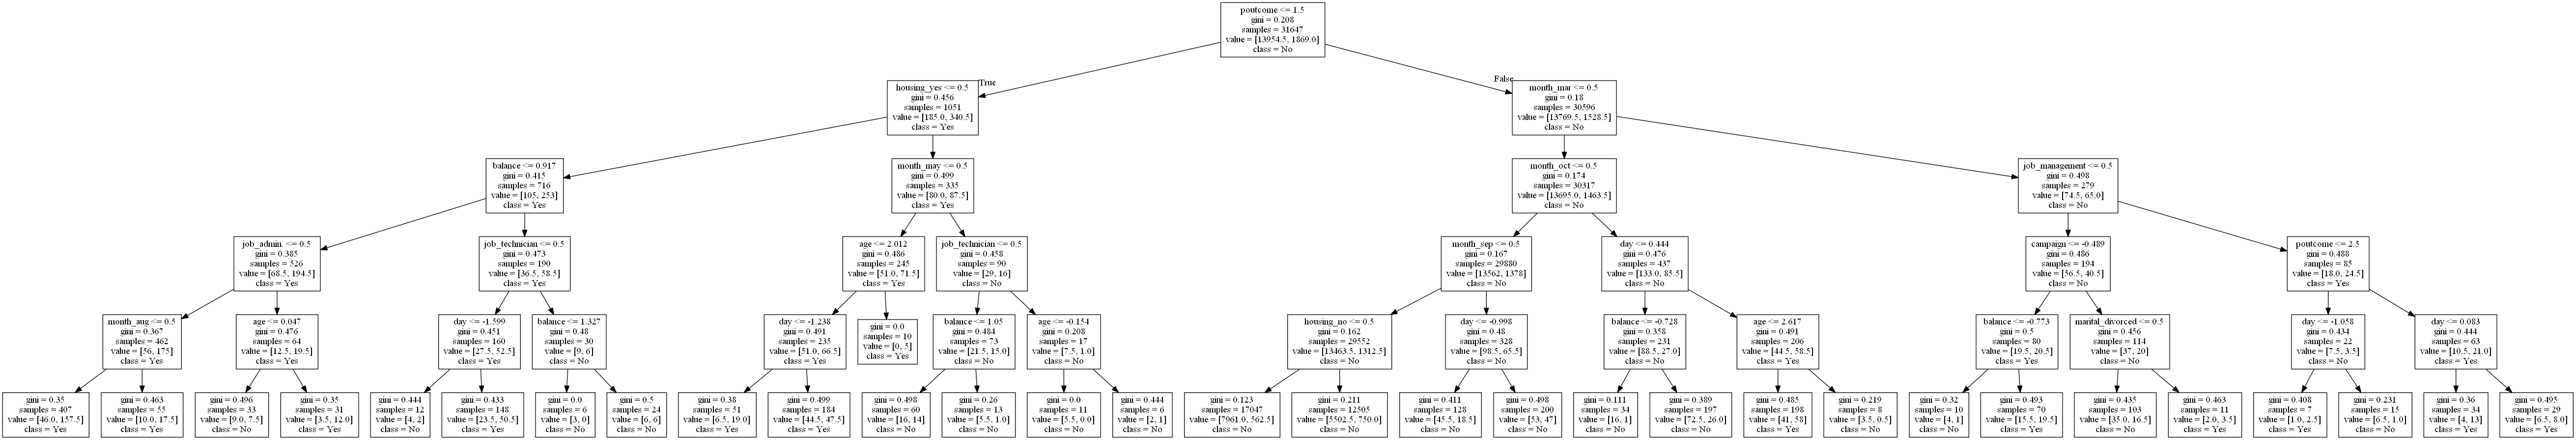

In [107]:
from sklearn import tree
from os import system
class_label = ['No', 'Yes']
output_FileR = open('output_treeR.dot','w')
dot_data = tree.export_graphviz(clf_dtree, out_file=output_FileR, feature_names = list(X_train), class_names = list(class_label))
output_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng output_treeR.dot -o output_FileR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("output_FileR.png"))

#### 5.3.3.3 Confusion Matrix Decision tree and comparison with others

In [50]:

df_cm_dtree = pd.DataFrame(metrics.confusion_matrix(y_test,clf_dtree.predict(X_test)))


(0.0, 1.0, 0.0, 1.0)

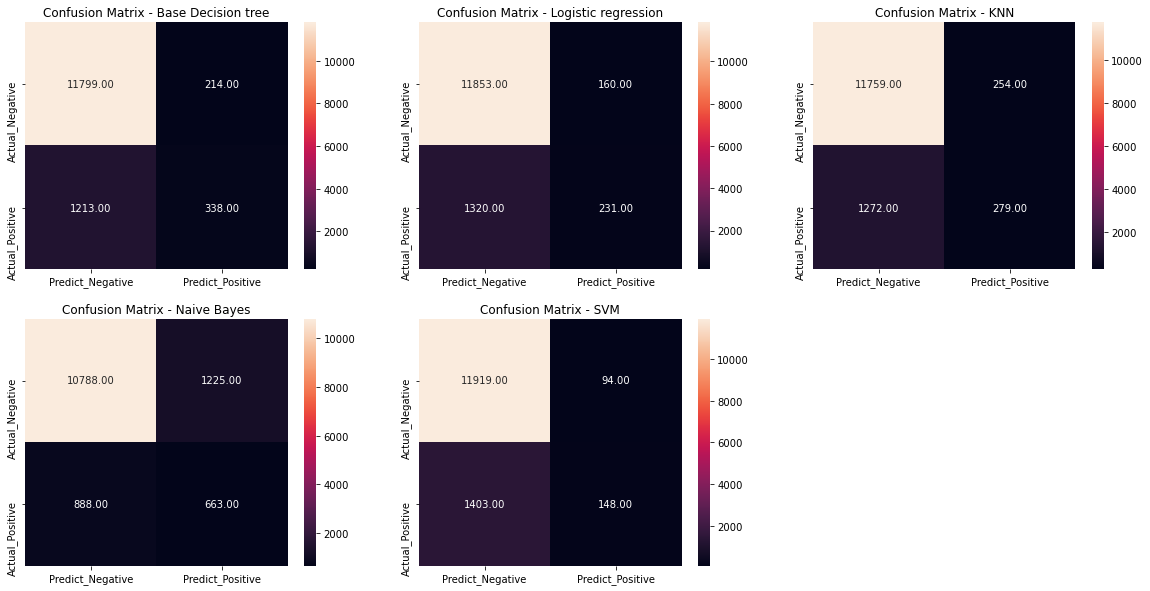

In [51]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(20,10))
sns.heatmap(df_cm_dtree,fmt='.2f',ax=ax1,annot=True,xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
ax1.set_title('Confusion Matrix - Base Decision tree')

sns.heatmap(df_cm_logistic,fmt='.2f',ax=ax2,annot=True,xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
ax2.set_title('Confusion Matrix - Logistic regression')

sns.heatmap(df_cm_knn,fmt='.2f',ax=ax3,annot=True,xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
ax3.set_title('Confusion Matrix - KNN')

sns.heatmap(df_cm_nb,fmt='.2f',ax=ax4,annot=True,xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
ax4.set_title('Confusion Matrix - Naive Bayes')

sns.heatmap(df_cm_svm,fmt='.2f',ax=ax5,annot=True,xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
ax5.set_title('Confusion Matrix - SVM')

ax6.axis('off')

##### Insights:
1. Only Naive bayes performed better than decision tree in classifying positives as positives (True Positives) and has the second best(minimum) figure for False negatives. but it has too many false positives 1225 compared to Decision trees
2. Looking at the nature of the prblem 'term depoosit subsciption'. It is not a high risk problem. Hence we can work with even low recall values i.e Hight FN. So our ideal target should be Hight TP and lower FN
3. This problem we have a high precisiona nd low recall value for all the basic classifiers
4. Logistic regression has a higher AUC and precision but it has a very low TP rate than decision trees

#### Among basic models Decision tree with max_depth 5 seems to be the best classifier

## 6. Building Ensemble models

We will build ensemble models and compare the models at the end in section model evaluation

### 6.1 Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
clf_RandomForest = RandomForestClassifier()
lstClassifier.append(('Random Forest',clf_RandomForest))

In [53]:
clf_RandomForest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
print('Random Forest - Accuracy Score - Test dataset  : {0:0.4f}'.format(clf_RandomForest.score(X_test,y_test)))
print('Random Forest - Accuracy Score - Train dataset : {0:0.4f}'.format(clf_RandomForest.score(X_train,y_train)))
print('Random Forest - Precision Score                : {0:0.4f}'.format(precision_score(y_test,clf_RandomForest.predict(X_test))))
print('Random Forest - Recall Score                   : {0:0.4f}'.format(recall_score(y_test,clf_RandomForest.predict(X_test))))

Random Forest - Accuracy Score - Test dataset  : 0.8922
Random Forest - Accuracy Score - Train dataset : 0.9999
Random Forest - Precision Score                : 0.5753
Random Forest - Recall Score                   : 0.2192


In [55]:
df_cm_randomforest = pd.DataFrame(confusion_matrix(y_test,clf_RandomForest.predict(X_test)))
df_cm_randomforest

,0,1
0,11762,251
1,1211,340


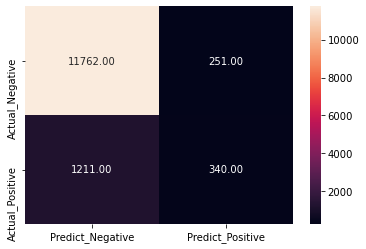

In [56]:
sns.heatmap(df_cm_randomforest,fmt='.2f',annot=True,xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])

### 6.1.1  Hyperparameter tuning Random Forest

In [57]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs=-1)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [58]:
print('Random Forest CV - Accuracy Score - Test dataset  : {0:0.4f}'.format(CV_rfc.score(X_test,y_test)))
print('Random Forest CV - Accuracy Score - Train dataset : {0:0.4f}'.format(CV_rfc.score(X_train,y_train)))
print('Random Forest CV - Precision Score                : {0:0.4f}'.format(precision_score(y_test,CV_rfc.predict(X_test))))
print('Random Forest CV - Recall Score                   : {0:0.4f}'.format(recall_score(y_test,CV_rfc.predict(X_test))))

Random Forest CV - Accuracy Score - Test dataset  : 0.8944
Random Forest CV - Accuracy Score - Train dataset : 0.8952
Random Forest CV - Precision Score                : 0.6820
Random Forest CV - Recall Score                   : 0.1438


In [59]:
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [101]:
lstClassifier.append(('Random Forest - Tunes',CV_rfc))

#### Insights

After tuning the hyperparameter max depth of 8 and criterion as entropy gives us a vest precision value of 68% compared to 57% with max depth of 5 and criterion gini
But this comes at the cost of recall.
There is no significant change in Accuracy score of the same.

### 6.2 Bagging classifier (with Decision Tree estimator)

In [60]:
from sklearn.ensemble import BaggingClassifier
clf_bagging = BaggingClassifier(base_estimator=clf_dtree,n_estimators=50,max_samples=0.7)
clf_bagging.fit(X_train,y_train)
lstClassifier.append(('Bagging DT',clf_bagging))

In [61]:
print('Bagging - Accuracy Score - Test dataset  : {0:0.4f}'.format(clf_bagging.score(X_test,y_test)))
print('Bagging - Accuracy Score - Train dataset : {0:0.4f}'.format(clf_bagging.score(X_train,y_train)))
print('Bagging - Precision Score                : {0:0.4f}'.format(precision_score(y_test,clf_bagging.predict(X_test))))
print('Bagging - Recall Score                   : {0:0.4f}'.format(recall_score(y_test,clf_bagging.predict(X_test))))

Bagging - Accuracy Score - Test dataset  : 0.8966
Bagging - Accuracy Score - Train dataset : 0.8967
Bagging - Precision Score                : 0.6487
Bagging - Recall Score                   : 0.2095


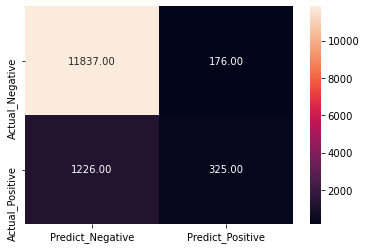

In [62]:
df_cm_bagging= pd.DataFrame(confusion_matrix(y_test,clf_bagging.predict(X_test)))
sns.heatmap(df_cm_bagging,fmt='.2f',annot=True,xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])

### 6.3 AdaBoost (with Decision Tree estimator)

In [63]:
from sklearn.ensemble import AdaBoostClassifier
clf_adaboost = AdaBoostClassifier(base_estimator=clf_dtree,n_estimators=50,learning_rate=0.1)
clf_adaboost.fit(X_train,y_train)
lstClassifier.append(('Adaboost DT',clf_adaboost))

In [64]:
print('Adaboost - Accuracy Score - Test dataset  : {0:0.4f}'.format(clf_adaboost.score(X_test,y_test)))
print('Adaboost - Accuracy Score - Train dataset : {0:0.4f}'.format(clf_adaboost.score(X_train,y_train)))
print('Adaboost - Precision Score                : {0:0.4f}'.format(precision_score(y_test,clf_adaboost.predict(X_test))))
print('Adaboost - Recall Score                   : {0:0.4f}'.format(recall_score(y_test,clf_adaboost.predict(X_test))))

Adaboost - Accuracy Score - Test dataset  : 0.8958
Adaboost - Accuracy Score - Train dataset : 0.9033
Adaboost - Precision Score                : 0.6407
Adaboost - Recall Score                   : 0.2012


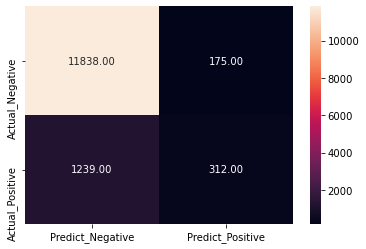

In [65]:
df_cm_adaboost= pd.DataFrame(confusion_matrix(y_test,clf_adaboost.predict(X_test)))
sns.heatmap(df_cm_adaboost,fmt='.2f',annot=True,xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])

### 6.4 Gradientboost with Decision Tree estimator

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gradient = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, max_depth=5)
clf_gradient.fit(X_train,y_train)
lstClassifier.append(('Gradient Boosting',clf_gradient))

In [67]:
print('Gradient Boost - Accuracy Score - Test dataset  : {0:0.4f}'.format(clf_gradient.score(X_test,y_test)))
print('Gradient Boost - Accuracy Score - Train dataset : {0:0.4f}'.format(clf_gradient.score(X_train,y_train)))
print('Gradient Boost - Precision Score                : {0:0.4f}'.format(precision_score(y_test,clf_gradient.predict(X_test))))
print('Gradient Boost - Recall Score                   : {0:0.4f}'.format(recall_score(y_test,clf_gradient.predict(X_test))))

Gradient Boost - Accuracy Score - Test dataset  : 0.8948
Gradient Boost - Accuracy Score - Train dataset : 0.9044
Gradient Boost - Precision Score                : 0.6161
Gradient Boost - Recall Score                   : 0.2121


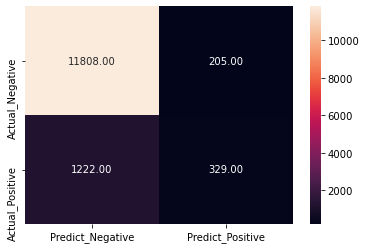

In [68]:
df_cm_gradient= pd.DataFrame(confusion_matrix(y_test,clf_gradient.predict(X_test)))
sns.heatmap(df_cm_gradient,fmt='.2f',annot=True,xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])

###  6.5 Logistic regression with bagging and adaboost

In [69]:
clf_bag_log = BaggingClassifier(base_estimator=clf_logistic,n_estimators=100,max_samples=0.7)
clf_bag_log.fit(X_train,y_train)
clf_bag_log.score(X_test,y_test)
lstClassifier.append(('Bagging-Logistic',clf_bag_log))

In [70]:
print('bagging-logistic - Accuracy Score - Test dataset  : {0:0.4f}'.format(clf_bag_log.score(X_test,y_test)))
print('bagging-logistic - Accuracy Score - Train dataset : {0:0.4f}'.format(clf_bag_log.score(X_train,y_train)))
print('bagging-logistic - Precision Score                : {0:0.4f}'.format(precision_score(y_test,clf_bag_log.predict(X_test))))
print('bagging-logistic - Recall Score                   : {0:0.4f}'.format(recall_score(y_test,clf_bag_log.predict(X_test))))

bagging-logistic - Accuracy Score - Test dataset  : 0.8908
bagging-logistic - Accuracy Score - Train dataset : 0.8879
bagging-logistic - Precision Score                : 0.5897
bagging-logistic - Recall Score                   : 0.1483


In [71]:
clf_ada_log = AdaBoostClassifier(base_estimator=clf_logistic,n_estimators=100)
clf_ada_log.fit(X_train,y_train)
lstClassifier.append(('Adaboost-logistic',clf_ada_log))

print('Adaboost-logistic - Accuracy Score - Test dataset  : {0:0.4f}'.format(clf_ada_log.score(X_test,y_test)))
print('Adaboost-logistic - Accuracy Score - Train dataset : {0:0.4f}'.format(clf_ada_log.score(X_train,y_train)))
print('Adaboost-logistic - Precision Score                : {0:0.4f}'.format(precision_score(y_test,clf_ada_log.predict(X_test))))
print('Adaboost-logistic - Recall Score                   : {0:0.4f}'.format(recall_score(y_test,clf_ada_log.predict(X_test))))

Adaboost-logistic - Accuracy Score - Test dataset  : 0.8919
Adaboost-logistic - Accuracy Score - Train dataset : 0.8884
Adaboost-logistic - Precision Score                : 0.6491
Adaboost-logistic - Recall Score                   : 0.1193


### 6.6 KNN with Bagging

In [72]:
clf_bag_knn = BaggingClassifier(base_estimator=clf_knn,n_estimators=10)
clf_bag_knn.fit(X_train,y_train)
lstClassifier.append(('Bagging-KNN',clf_bag_knn))

print('bagging-KNN - Accuracy Score - Test dataset  : {0:0.4f}'.format(clf_bag_knn.score(X_test,y_test)))
print('bagging-KNN - Accuracy Score - Train dataset : {0:0.4f}'.format(clf_bag_knn.score(X_train,y_train)))
print('bagging-KNN - Precision Score                : {0:0.4f}'.format(precision_score(y_test,clf_bag_knn.predict(X_test))))
print('bagging-KNN - Recall Score                   : {0:0.4f}'.format(recall_score(y_test,clf_bag_knn.predict(X_test))))

bagging-KNN - Accuracy Score - Test dataset  : 0.8886
bagging-KNN - Accuracy Score - Train dataset : 0.9054
bagging-KNN - Precision Score                : 0.5391
bagging-KNN - Recall Score                   : 0.1779


### 6.7 Naive bayes with Bagging and Adaboost

In [77]:
clf_bag_nb = BaggingClassifier(base_estimator=clf_nb,n_estimators=100)
clf_bag_nb.fit(X_train,y_train)
lstClassifier.append(('Bagging-NB',clf_bag_nb))

print('Bagging-nb - Accuracy Score - Test dataset  : {0:0.4f}'.format(clf_bag_nb.score(X_test,y_test)))
print('Bagging-nb - Accuracy Score - Train dataset : {0:0.4f}'.format(clf_bag_nb.score(X_train,y_train)))
print('Bagging-nb - Precision Score                : {0:0.4f}'.format(precision_score(y_test,clf_bag_nb.predict(X_test))))
print('Bagging-nb - Recall Score                   : {0:0.4f}'.format(recall_score(y_test,clf_bag_nb.predict(X_test))))

Bagging-nb - Accuracy Score - Test dataset  : 0.8432
Bagging-nb - Accuracy Score - Train dataset : 0.8458
Bagging-nb - Precision Score                : 0.3492
Bagging-nb - Recall Score                   : 0.4300


In [78]:
clf_ada_nb = AdaBoostClassifier(base_estimator=clf_nb,n_estimators=100)
clf_ada_nb.fit(X_train,y_train)
lstClassifier.append(('Adaboost-NB',clf_ada_nb))
print('Adaboost-nb - Accuracy Score - Test dataset  : {0:0.4f}'.format(clf_ada_nb.score(X_test,y_test)))
print('Adaboost-nb - Accuracy Score - Train dataset : {0:0.4f}'.format(clf_ada_nb.score(X_train,y_train)))
print('Adaboost-nb - Precision Score                : {0:0.4f}'.format(precision_score(y_test,clf_ada_nb.predict(X_test))))
print('Adaboost-nb - Recall Score                   : {0:0.4f}'.format(recall_score(y_test,clf_ada_nb.predict(X_test))))

Adaboost-nb - Accuracy Score - Test dataset  : 0.8165
Adaboost-nb - Accuracy Score - Train dataset : 0.8140
Adaboost-nb - Precision Score                : 0.1278
Adaboost-nb - Recall Score                   : 0.1038


## 6.8 Hybrid Model (using different algorithms in one model)

In [79]:
from sklearn.ensemble import VotingClassifier


In [80]:
estimators = []

#Defining 5 Logistic Regression Models
model11 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic1', model11))
model12 = LogisticRegression(penalty = 'l2', random_state = 0)
estimators.append(('logistic2', model12))


#Defining 5 Decision Tree Classifiers
model16 = DecisionTreeClassifier(max_depth = 3)
estimators.append(('cart1', model16))
model17 = DecisionTreeClassifier(max_depth = 4)
estimators.append(('cart2', model17))
model18 = DecisionTreeClassifier(max_depth = 5)


#Defining 5 K-NN classifiers
model26 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
estimators.append(('knn1', model26))
model27 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 1)
estimators.append(('knn2', model27))


#Defining 5 Naive Bayes classifiers
model31 = GaussianNB()
estimators.append(('nbs1', model31))
model32 = GaussianNB()
estimators.append(('nbs2', model32))


# Defining the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
lstClassifier.append(('Ensemble Hybrid',ensemble))
y_pred = ensemble.predict(X_test)

#Confisuin matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)

In [81]:
df_cm_hybrid = pd.DataFrame(cm_HybridEnsembler)
df_cm_hybrid

,0,1
0,11858,155
1,1280,271


In [82]:
print('ensemble-hybrid - Accuracy Score - Test dataset  : {0:0.4f}'.format(ensemble.score(X_test,y_test)))
print('ensemble-hybrid - Accuracy Score - Train dataset : {0:0.4f}'.format(ensemble.score(X_train,y_train)))
print('ensemble-hybrid - Precision Score                : {0:0.4f}'.format(precision_score(y_test,ensemble.predict(X_test))))
print('ensemble-hybrid - Recall Score                   : {0:0.4f}'.format(recall_score(y_test,ensemble.predict(X_test))))

ensemble-hybrid - Accuracy Score - Test dataset  : 0.8942
ensemble-hybrid - Accuracy Score - Train dataset : 0.8953
ensemble-hybrid - Precision Score                : 0.6362
ensemble-hybrid - Recall Score                   : 0.1747


## 7. Model Evaluation

##### Metrics:
Since the problem is from banking domain and requires to identify customer who will opt for a particular term deposit product.
This problem is not very risky and hence we can manage to keep type 2 error high that is Recall
can be low, however Type 1 error should be low which menas Precison should be high i.e. FP are low

We will choose a model with highest precision and highest recall values, however looking at the data Recall will be very low

###  7.1 Model comparison

In [102]:
lst_models = []
for index,clf in lstClassifier:
    #print(index)
    df = model_testing(clf,index)
    lst_models.append(df)
df_model_performance = pd.concat(lst_models,ignore_index=True)
df_model_performance

,Model Name,Accuracy-Out of sample,Accuracy-In sample,Precision,Recall,f1 score,Area under curve
0,Logistic,0.890888,0.887951,0.590793,0.148936,0.237899,0.743641
1,KNN,0.887496,0.903656,0.523452,0.179884,0.267754,0.674044
2,Naive Bayes,0.844220,0.846431,0.351165,0.427466,0.385577,0.723048
3,SVM,0.889634,0.885076,0.611570,0.095422,0.165086,0.000000
4,Decision Tree,0.894795,0.895124,0.612319,0.217924,0.321446,0.696004
5,Random Forest,0.892215,0.999874,0.575296,0.219213,0.317460,0.757452
6,Bagging DT,0.896638,0.896704,0.648703,0.209542,0.316764,0.738699
7,Adaboost DT,0.895753,0.903308,0.640657,0.201161,0.306183,0.756590
8,Gradient Boosting,0.894795,0.904446,0.616105,0.212121,0.315588,0.774169
9,Bagging-Logistic,0.890814,0.887920,0.589744,0.148291,0.236991,0.743865


####  Insights
Random Forest max depth 5
1.  Precison of 57% and recall of 22% and AUC of  75.7%
2. This model has a very low precison value bue AUC-ROC is quite high

Random Forest Hyperparameter tuned
1. Among all the trained models Hyperparameter tuned model Random Forest with Criterion as Entropy and max depth of 8 seems to be the best
2. This model has the seconf highest AUC - ROC = 0.764 and highest precison 68%. Precison is quiet low 14%
3. Accuracy score is almost the same for all the models

Gradient Boosting Model:
1. This model has the best balance between Precision and recall scores 61% and 21% resp.
2. AUC-ROC for this model is 77% which is highest among all the models

- Accuracy score of all the models is comparable
- rest of the models have  either very low precison of recall scores. Auc is also low


### 7.2 Confusion Matrices

In [85]:
def confusionMatrix(classifier):
    y_pred1 = classifier.predict(X_test)
    df  = pd.DataFrame(confusion_matrix(y_test, y_pred1))
    return df

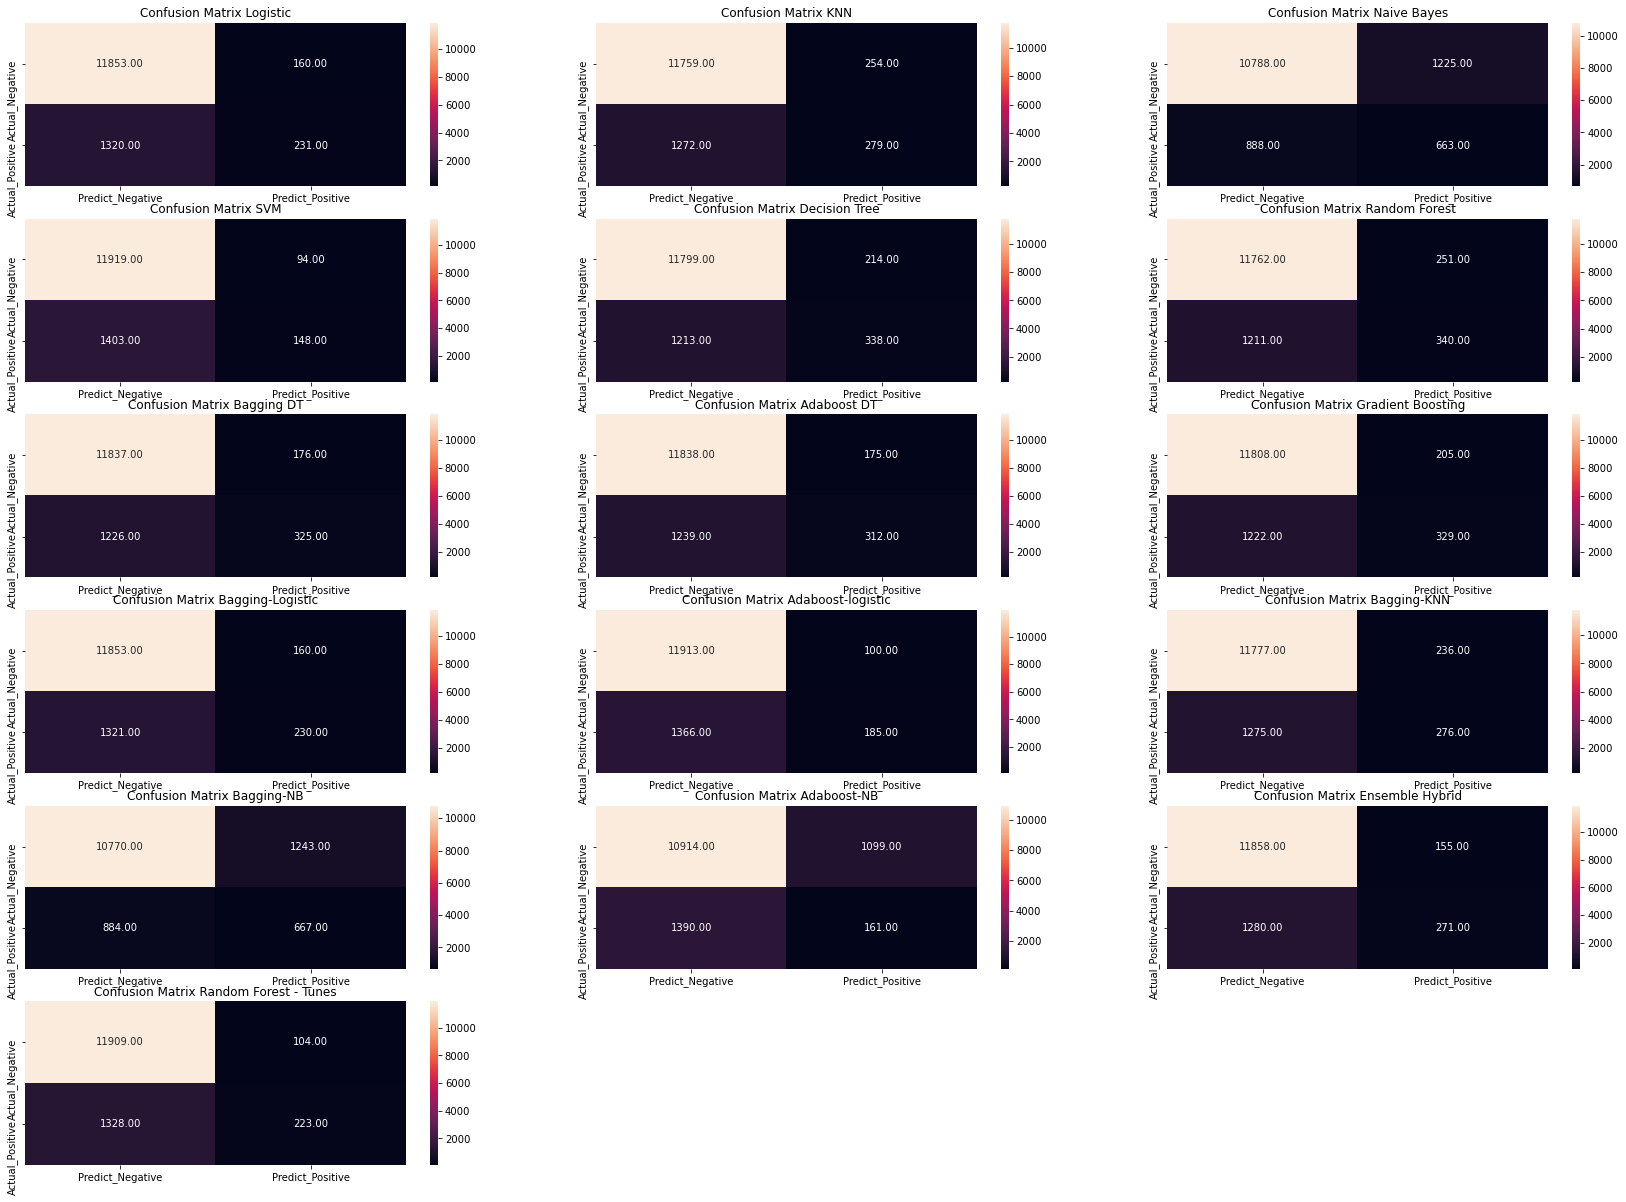

In [103]:
i=0
irow = int(np.ceil(len(lstClassifier)/3))
fig = plt.figure(1,(29,21))
for index,clf in lstClassifier:
    i+=1
    ax = plt.subplot(irow,3,i)
    df=confusionMatrix(clf)
    sns.heatmap(df,ax=ax,fmt='.2f',annot=True,xticklabels=['Predict_Negative','Predict_Positive'],yticklabels=['Actual_Negative','Actual_Positive'])
    plt.title('Confusion Matrix '+ index)

### 7.3 Precision Recall curves

In [88]:
def calcyProb(classifier, model_name):
    if (model_name != 'SVM' and model_name != 'Ensemble Hybrid'):
        prob = pd.DataFrame(classifier.predict_proba(X_test))
        y_prob1 = list(prob[1])
        return y_prob1

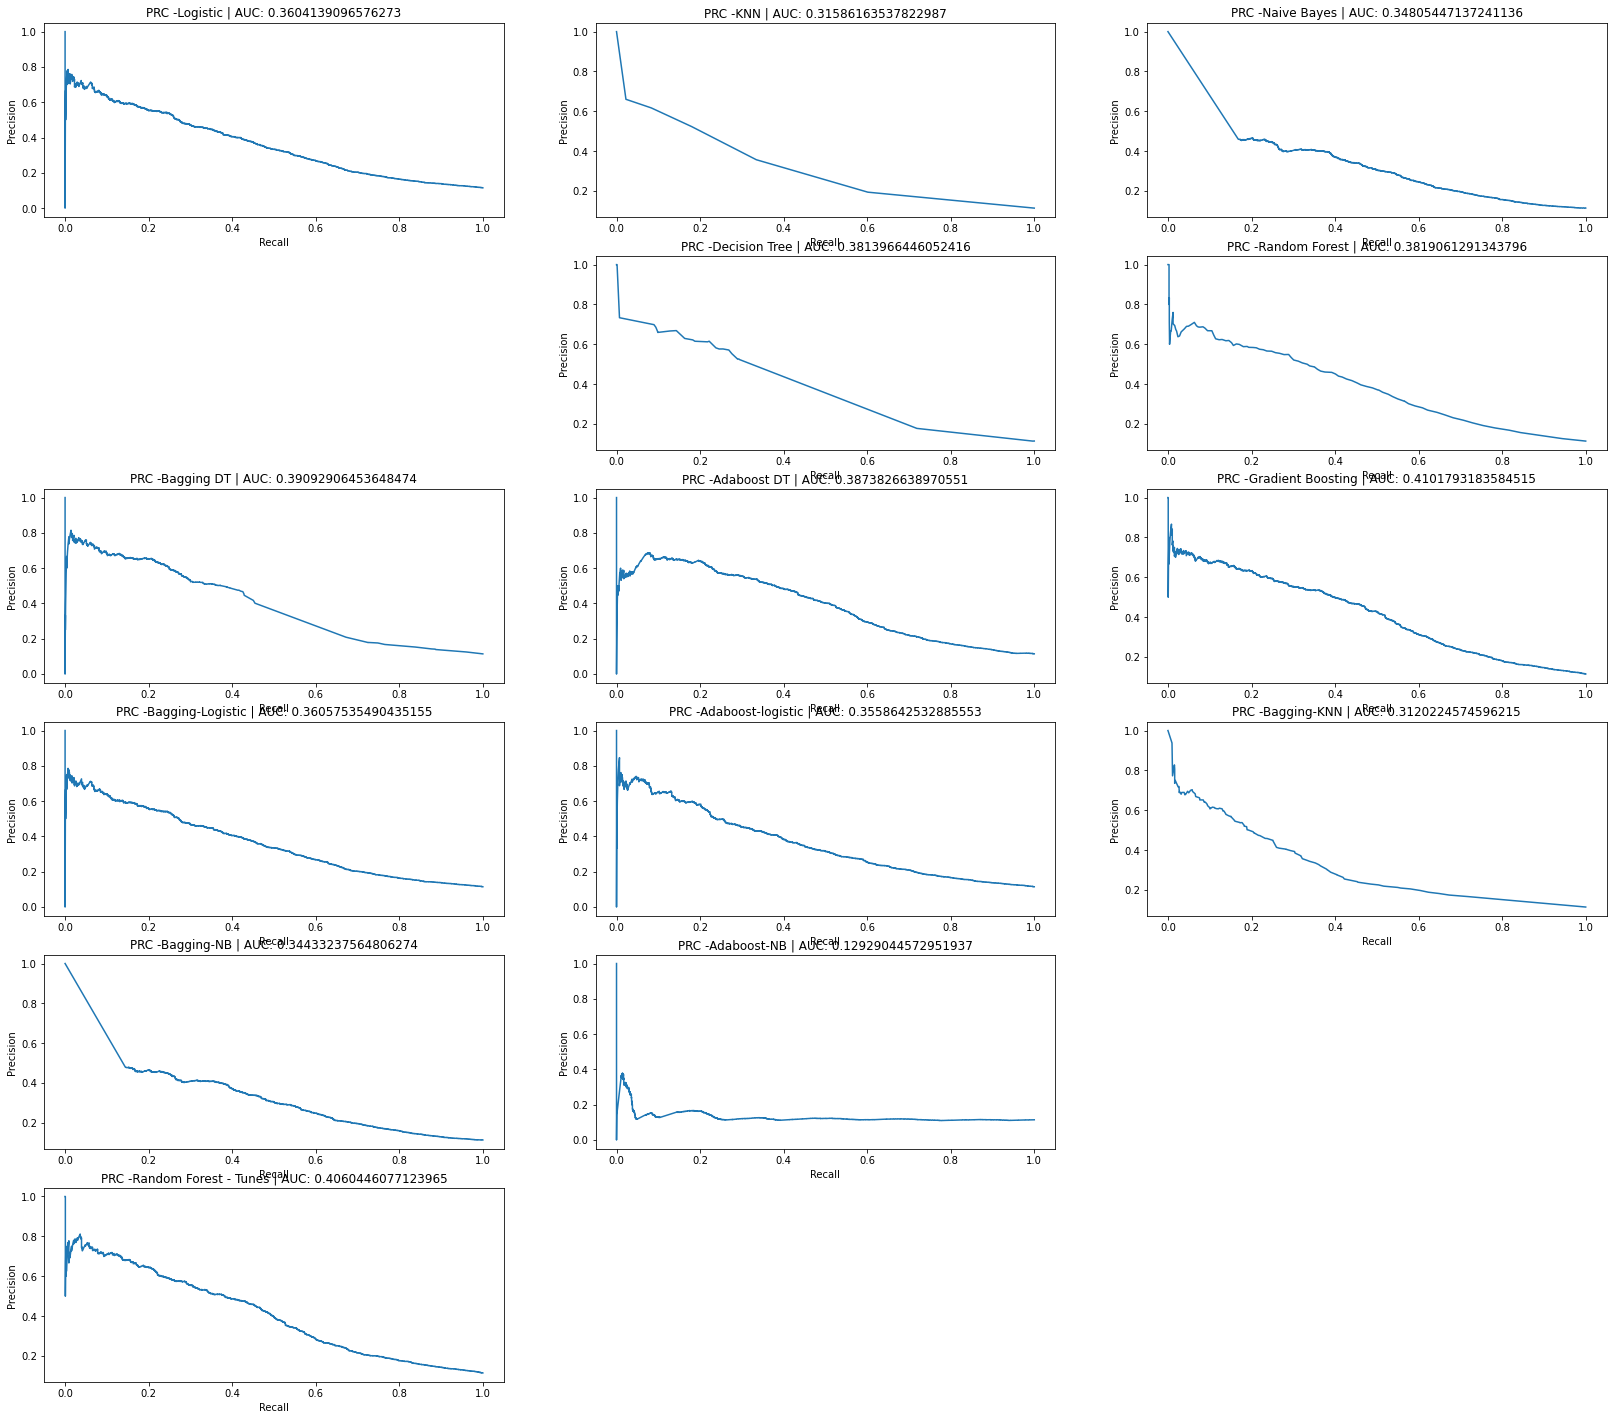

In [104]:
i=0
ncol=3
irow = int(np.ceil(len(lstClassifier)/ncol))
fig = plt.figure(1,(28,25))
for index,clf in lstClassifier:
    i+=1
    if (index != 'SVM' and index != 'Ensemble Hybrid'):
        ax = plt.subplot(irow,ncol,i)
        y_prob = calcyProb(clf,index)
        precision, recall, _ = metrics.precision_recall_curve(y_test,y_prob)
        auc = metrics.auc(recall, precision)
        plt.plot(recall,precision,label=index)
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('PRC -'+ index + ' | AUC: ' + str(auc))
        

Note: Curves are not printed for SVMs

#### Conclusions

- Since this is an imbalanced dataset and recall of almost all the models is quite low. Which means this model is quite good in clasifying negative value(class=No) and makes mistake in classifying positive values(class=yes)
- Also as explained earlier for this problem precison needs to be high. Although recall should be also high but assuming that since the issue is not risky we will keep recall to be max but it will be low anyhow
- Ideally AUC for PRC should be close to 1 but its quite low also

- Finally after analysing comparison table. confusion matrix and PRC Curves of all the model we can see that among all the models:

1. Random Forest         TP=340 FN=251 FP=1211 AUC-PRC=38.13% AUC-ROC=75.7%
2. Random Forest Tuned   TP=223 FN=104 FP=1328 AUC-PRC=40.64% AUC-ROC=76.49%
3. Gradient boosting     TP=329 FN=204 FP=1222 AUC-PRC=41.01% AUC-ROC=77.4%

Gradient boosting has balance between True Positives, False Negatives, False positives and has a good AUC-PRC and AUC-ROC 

### Considering above factors Gradient boosting classifier seems to be the best classifier in this situation as it optimises between precision and recall with precison being quite high and recall being best among all the models. It has a higher AUC-PRC and AUC-ROC  among all the models